#  Preprocessing - 2

In [1]:
# importing required packages
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# uploading the dataset
df = pd.read_csv('delhi.csv', parse_dates = ['date'])
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,60.0,09-01-1987,Delhi,Delhi,Central Pollution Control Board,Residential,8.6,16.2,NaN,323.0,NaN,NaN,1987-09-01
1,59.0,09-02-1987,Delhi,Delhi,Central Pollution Control Board,Residential,6.5,9.3,NaN,488.0,NaN,NaN,1987-09-02
2,58.0,09-03-1987,Delhi,Delhi,Central Pollution Control Board,Industrial,25.8,10.4,NaN,487.0,NaN,NaN,1987-09-03
3,57.0,09-03-1987,Delhi,Delhi,Central Pollution Control Board,Industrial,0.5,2.8,NaN,528.0,NaN,NaN,1987-09-03
4,56.0,09-02-1987,Delhi,Delhi,Central Pollution Control Board,Industrial,2.5,12.8,NaN,506.0,NaN,NaN,1987-09-02


# Understanding the dataset 

### FINDING THE UNIQUE CELLS IN EACH COLUMN

In [3]:
code = df.stn_code.unique()
len(code)

12

In [4]:
df.agency.unique()

array(['Central Pollution Control Board', nan,
       'National Environmental Engineering Research Institute'],
      dtype=object)

In [5]:
df.type.unique()

array(['Residential', 'Industrial', 'Residential, Rural and other Areas',
       'Industrial Area', 'Industrial Areas', 'Residential and others'],
      dtype=object)

In [6]:
df.location_monitoring_station.unique()

array([nan, 'Nizamuddin, Delhi', 'Ashok Vihar, Delhi',
       'Shahzada Bagh, Delhi', 'Shahadra, Delhi', 'Janakpuri, Delhi',
       'Siri Fort, Delhi', 'Mayapuri Indl. Area', 'Shahdara',
       'Shahzada Bagh', 'Ashok Vihar', 'BSZ Marg', 'DCE', 'Janakpuri',
       'N.Y. School', 'Nizamuddin', 'Siri Fort', 'Town Hall',
       'Pritampura', 'Pritampura, Delhi',
       'N.Y. SCHOOL, Sarojini Nagar, Delhi',
       'Town Hall, Ayurvedic Dispensary, Chandni Chowk, Delhi',
       'Mayapuri Industrial Area, Delhi'], dtype=object)

In [7]:
df.location.unique()

array(['Delhi'], dtype=object)

### CHECKING FOR EMPTY CELLS

In [8]:
date_null_check1 = pd.isnull(df['sampling_date'])
date_null_check1.sum()

0

In [9]:
date_null_check2 = pd.isnull(df['agency'])
date_null_check2.sum()

3956

In [10]:
date_null_check3 = pd.isnull(df['so2'])
date_null_check3.sum()

741

In [11]:
date_null_check4 = pd.isnull(df['no2'])
date_null_check4.sum()

544

In [12]:
date_null_check5 = pd.isnull(df['spm'])
date_null_check5.sum()

3092

In [13]:
date_null_check6 = pd.isnull(df['rspm'])
date_null_check6.sum()

1884

In [14]:
date_null_check1 = pd.isnull(df['pm2_5'])
date_null_check1.sum()

8180

### CHECKING THE DATES

In [15]:
# checking whether the time series is recorded daily or not
dates_in_datetime = pd.DataFrame(columns=['date'])
dates_in_datetime['Date']= pd.to_datetime(df['date']) 
type(dates_in_datetime['Date'][0])

one_day = dt.timedelta(days=1)
flag = 0
for i in range(1, len(dates_in_datetime['Date'])):
    if((dates_in_datetime['Date'][i] - dates_in_datetime['Date'][i-1]) == one_day):
        continue
    else:
        flag=1

if(flag==0):
    print("Values are recorded on a daily basis")
else:
    print("Values are not recorded on a daily basis")

Values are not recorded on a daily basis


C:\ANACONDA\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Dates')

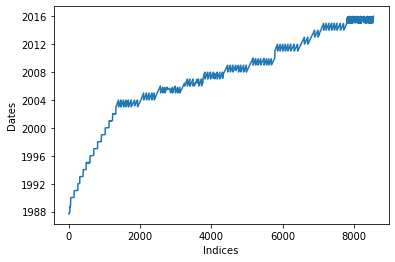

In [16]:
# plotting the dates
dates_in_datetime.index
x = [i for i in range(0, len(dates_in_datetime['Date']))]
y = dates_in_datetime['Date']

plt.plot(x,y)

plt.xlabel("Indices")
plt.ylabel("Dates")

In [17]:
# identifying whether there are duplicate cells for a particular day
idx = pd.date_range(df['date'].min(), df['date'].max())
s = df.groupby(['date']).size()

In [18]:
print(s)

date
1987-09-01    1
1987-09-02    3
1987-09-03    2
1987-10-01    2
1987-10-03    3
             ..
2015-12-23    2
2015-12-28    1
2015-12-29    5
2015-12-30    5
2015-12-31    3
Length: 3073, dtype: int64


### UNDERSTANDING DATA BASED ON MONITORING STATION

In [19]:
# sorting the dataset based on the monitoring station
df.sort_values(by=['location_monitoring_station','date'])

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
2699,NaN,01-03-2005,Delhi,Delhi,NaN,Residential and others,8.0,42.0,90.0,218.0,Ashok Vihar,NaN,2005-01-03
2700,NaN,01-06-2005,Delhi,Delhi,NaN,Residential and others,9.0,54.0,99.0,213.0,Ashok Vihar,NaN,2005-01-06
2701,NaN,01-11-2005,Delhi,Delhi,NaN,Residential and others,8.0,47.0,90.0,287.0,Ashok Vihar,NaN,2005-01-11
2702,NaN,14-01-2005,Delhi,Delhi,NaN,Residential and others,8.0,47.0,62.0,223.0,Ashok Vihar,NaN,2005-01-14
2703,NaN,25-01-2005,Delhi,Delhi,NaN,Residential and others,6.0,32.0,96.0,233.0,Ashok Vihar,NaN,2005-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,145.0,28-12-2003,Delhi,Delhi,NaN,Industrial Area,12.0,52.0,NaN,489.0,NaN,NaN,2003-12-28
1461,56.0,29-12-2003,Delhi,Delhi,Central Pollution Control Board,Industrial Area,8.0,43.0,192.0,333.0,NaN,NaN,2003-12-29
1749,60.0,29-12-2003,Delhi,Delhi,Central Pollution Control Board,"Residential, Rural and other Areas",11.0,45.0,289.0,497.0,NaN,NaN,2003-12-29
1393,55.0,30-12-2003,Delhi,Delhi,Central Pollution Control Board,Industrial Area,14.0,52.0,147.0,335.0,NaN,NaN,2003-12-30


In [20]:
# tuples for each monitoring station
df['location_monitoring_station'].value_counts()

N.Y. SCHOOL, Sarojini Nagar, Delhi                       472
Town Hall, Ayurvedic Dispensary, Chandni Chowk, Delhi    469
Mayapuri Industrial Area, Delhi                          463
Mayapuri Indl. Area                                      383
Town Hall                                                378
Shahdara                                                 368
Janakpuri                                                360
Siri Fort                                                358
Shahzada Bagh                                            350
Nizamuddin                                               348
N.Y. School                                              334
Shahadra, Delhi                                          306
Nizamuddin, Delhi                                        305
Shahzada Bagh, Delhi                                     302
Siri Fort, Delhi                                         301
Janakpuri, Delhi                                         297
Pritampura              

# Preprocessng the dataset as per requirements

In [21]:
# removing redundancy and complex tuple values 
a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['type'] = a

In [22]:
# removing redundancies in location_monitoring_station column
a = list(df['location_monitoring_station'])
for i in range(0,len(df)):
    if str(a[i]) == 'Ashok Vihar, Delhi':
        a[i] = 'Ashok Vihar'
    elif str(a[i]) == 'Pritampura, Delhi':
        a[i] = 'Pritampura'
    elif str(a[i]) == 'Janakpuri, Delhi':
        a[i] = 'Janakpuri'
    elif str(a[i]) == 'Siri Fort, Delhi':
        a[i] = 'Siri Fort'
    elif str(a[i]) == 'Shahzada Bagh, Delhi':
        a[i] = 'Shahzada Bagh'
    elif str(a[i]) == 'Nizamuddin, Delhi':
        a[i] = 'Nizamuddin'
    elif str(a[i]) == 'Shahadra, Delhi':
        a[i] = 'Shahdara'
    elif str(a[i]) == 'Town Hall, Ayurvedic Dispensary, Chandni Chowk, Delhi':
        a[i] = 'Town Hall'
    elif str(a[i]) == 'N.Y. SCHOOL, Sarojini Nagar, Delhi':
        a[i] = 'N.Y. School'
    elif str(a[i]) == 'Mayapuri Industrial Area, Delhi' or str(a[i]) == 'Mayapuri Indl. Area':
        a[i] = 'Mayapuri'

In [23]:
df['location_monitoring_station'] = a

In [24]:
# sorting the dataframe by location_monitoring_station and date
df.sort_values(by=['location_monitoring_station','date'])

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
2099,56.0,01-02-2004,Delhi,Delhi,Central Pollution Control Board,Residential,NaN,NaN,198.50,324.0,Ashok Vihar,NaN,2004-01-02
2100,56.0,01-07-2004,Delhi,Delhi,Central Pollution Control Board,Residential,NaN,NaN,149.67,312.0,Ashok Vihar,NaN,2004-01-07
2101,56.0,01-12-2004,Delhi,Delhi,Central Pollution Control Board,Residential,NaN,NaN,136.50,360.0,Ashok Vihar,NaN,2004-01-12
2102,56.0,15-01-2004,Delhi,Delhi,Central Pollution Control Board,Residential,NaN,NaN,208.67,348.0,Ashok Vihar,NaN,2004-01-15
2103,56.0,20-01-2004,Delhi,Delhi,Central Pollution Control Board,Residential,NaN,NaN,245.50,429.0,Ashok Vihar,NaN,2004-01-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,145.0,28-12-2003,Delhi,Delhi,NaN,Industrial,12.0,52.0,NaN,489.0,NaN,NaN,2003-12-28
1461,56.0,29-12-2003,Delhi,Delhi,Central Pollution Control Board,Industrial,8.0,43.0,192.00,333.0,NaN,NaN,2003-12-29
1749,60.0,29-12-2003,Delhi,Delhi,Central Pollution Control Board,Residential,11.0,45.0,289.00,497.0,NaN,NaN,2003-12-29
1393,55.0,30-12-2003,Delhi,Delhi,Central Pollution Control Board,Industrial,14.0,52.0,147.00,335.0,NaN,NaN,2003-12-30


In [25]:
df['location_monitoring_station'].value_counts()

Town Hall        847
Mayapuri         846
N.Y. School      806
Shahdara         674
Siri Fort        659
Janakpuri        657
Nizamuddin       653
Shahzada Bagh    652
Pritampura       492
Ashok Vihar      148
BSZ Marg          69
DCE               26
Name: location_monitoring_station, dtype: int64

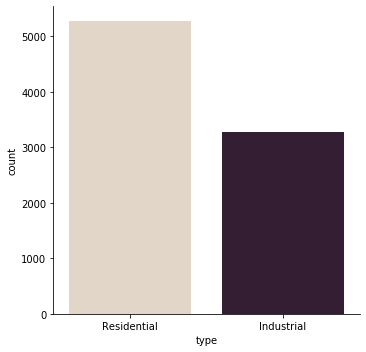

In [26]:
import seaborn as sns
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = df)

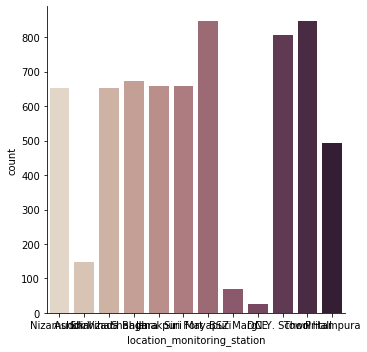

In [27]:
sns.catplot(x = "location_monitoring_station", kind = "count", palette = "ch: 0.25", data = df)

In [28]:
# droping columns which are not required
df = df.drop(columns=['stn_code','sampling_date','state','location','agency','type','pm2_5'])

In [29]:
df = df.set_index('date')

In [30]:
grouped = df.groupby(df.location_monitoring_station)

town_hall = grouped.get_group("Town Hall")
mayapuri = grouped.get_group("Mayapuri")
ny_school = grouped.get_group("N.Y. School")
siri_fort = grouped.get_group("Siri Fort")
janakpuri = grouped.get_group("Janakpuri")
nizamuddin = grouped.get_group("Nizamuddin")
shahzada_bagh = grouped.get_group("Shahzada Bagh")
pritampura = grouped.get_group("Pritampura")
shahdara = grouped.get_group("Shahdara")
ashok_vihar = grouped.get_group("Ashok Vihar")
BSZ_marg = grouped.get_group("BSZ Marg")
DCE = grouped.get_group("DCE")

In [31]:
# function to fill missing dates and missing cells
def fill(DF):
    DF = DF.resample('D').mean()
    DF = DF.interpolate(methods = 'date', limit_direction = 'both')
    return DF

In [32]:
# converting to csv file 
fill(mayapuri).to_csv("mayapuri.csv")
fill(ny_school).to_csv("ny_school.csv")
fill(siri_fort).to_csv("siri_fort.csv")
fill(janakpuri).to_csv("janakpuri.csv")
fill(nizamuddin).to_csv("nizamuddin.csv")
fill(shahzada_bagh).to_csv("shahzada_bagh.csv")
fill(pritampura).to_csv("pritampura.csv")
fill(shahdara).to_csv("shahdara.csv")
fill(ashok_vihar).to_csv("ashok_vihar.csv")
fill(BSZ_marg).to_csv('bsz_marg.csv')
fill(DCE).to_csv("dce.csv")

In [35]:
final = pd.DataFrame()

final = final.append(mayapuri)
final = final.append(ny_school)
final = final.append(siri_fort)
final = final.append(janakpuri)
final = final.append(nizamuddin)
final = final.append(shahzada_bagh)
final = final.append(pritampura)
final = final.append(shahdara)
final = final.append(ashok_vihar)
final = final.append(BSZ_marg)
final = final.append(DCE)

final.to_csv('final.csv')